In [12]:
#Load dataframes
import pandas as pd

new_player_df = pd.read_csv('new_player.csv')
experienced_player_df = pd.read_csv('experienced_player.csv')

print(new_player_df)
print(experienced_player_df)

       Unnamed: 0  account_id  spotted   hits  frags  wins  losses  battles  \
0               0  1025417833      773   6448    398   461     592     1082   
1               1  1032149965     1770  10117    594   583     865     1463   
2               2  1021602489      964  12188    756   787    1053     1864   
3               3  1014453715     1914  14374   1448   959    1000     1999   
4               4  1013992816     4627  24625   2105  1986    2239     4295   
...           ...         ...      ...    ...    ...   ...     ...      ...   
13425       13425  1043698230     1608   5178    236   465     813     1286   
13426       13426  1038299401     1519  14891    979   643     625     1281   
13427       13427  1011293680     1340  10790    927   724     781     1540   
13428       13428  1040606941     1331  11897   1899   793     602     1404   
13429       13429  1027362135     1952  16669   1586   994     892     1893   

       damaged_dealt  damaged_received  shots      

In [21]:
#Generate winrates
import statistics
import numpy as np

new_player_wins=new_player_df.iloc[:,5].values
new_player_battles=new_player_df.iloc[:,7].values

experienced_player_wins=experienced_player_df.iloc[:,5].values
experienced_player_battles=experienced_player_df.iloc[:,7].values

new_player_winrate = [new_player_win_count / new_player_battle_count for new_player_win_count, new_player_battle_count in zip(new_player_wins, new_player_battles)]
experienced_player_winrate = [experienced_player_win_count / experienced_player_battle_count for experienced_player_win_count, experienced_player_battle_count in zip(experienced_player_wins, experienced_player_battles)]

print(new_player_winrate)
print(experienced_player_winrate)

print(statistics.mean(new_player_winrate))
print(statistics.mean(experienced_player_winrate))

print(statistics.median(new_player_winrate))
print(statistics.median(experienced_player_winrate))

print(statistics.stdev(new_player_winrate))
print(statistics.stdev(experienced_player_winrate))

print(np.quantile(new_player_winrate, [0.25, 0.75]))
print(np.quantile(experienced_player_winrate, [0.25, 0.75]))

print()

[0.42606284658040666, 0.39849624060150374, 0.42221030042918456, 0.4797398699349675, 0.46239813736903373, 0.5659574468085107, 0.46909903201787045, 0.48005232177894047, 0.4666463600365519, 0.5265116279069767, 0.4580012262415696, 0.5541358439811701, 0.5054027504911591, 0.5268199233716475, 0.5125173852573018, 0.4497184231697506, 0.421875, 0.4734551784160139, 0.46473214285714287, 0.4176, 0.47924297924297926, 0.3989501312335958, 0.5227617602427921, 0.5294117647058824, 0.4631956912028725, 0.4614718614718615, 0.44085365853658537, 0.5020491803278688, 0.5318012999071495, 0.4422535211267606, 0.3933463796477495, 0.38581314878892736, 0.4358523725834798, 0.5037241379310344, 0.43657019204760616, 0.5395642201834863, 0.45161290322580644, 0.4954682779456193, 0.4812691131498471, 0.4082089552238806, 0.4980942828485456, 0.49118017639647205, 0.4369028006589786, 0.5143805309734514, 0.5236818588025023, 0.4669042769857434, 0.5346700083542189, 0.4117647058823529, 0.4159702878365831, 0.457402406088878, 0.4447900

NormaltestResult(statistic=1665.6792459110939, pvalue=0.0)
NormaltestResult(statistic=346.636321531053, pvalue=5.3564760313256746e-76)


C:\Users\ryane\AppData\Local\Temp\ipykernel_6816\2900529148.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=winrate_df, x='Winrate', y='Groups', palette=[sns.xkcd_rgb["rose red"], sns.xkcd_rgb["emerald"]]).set(title='Winrate by Group')


[Text(0.5, 1.0, 'Winrate by Group')]

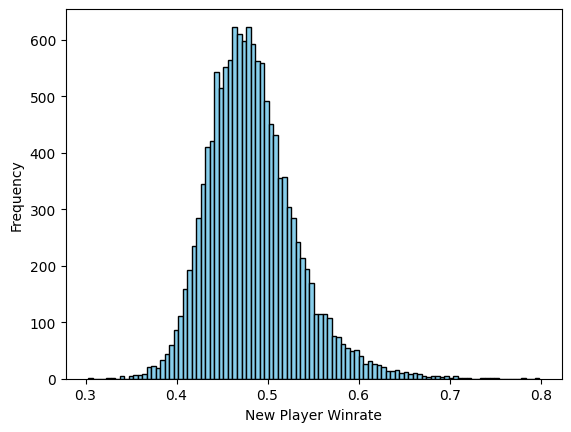

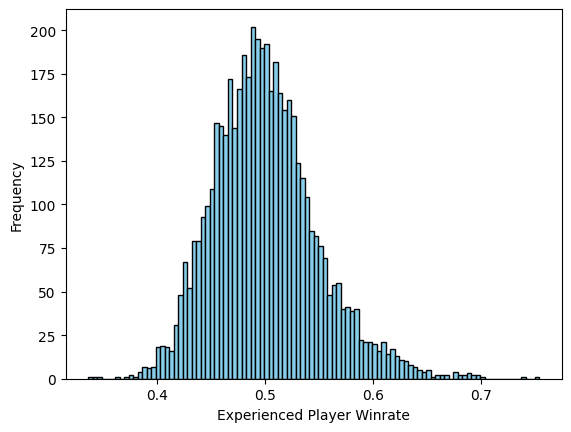

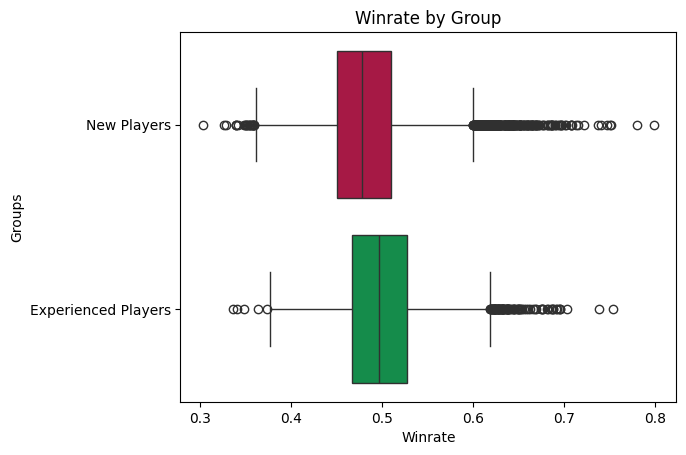

In [14]:
#Graphs of winrates
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

print(stats.normaltest(new_player_winrate))
print(stats.normaltest(experienced_player_winrate))

plt.figure()
plt.hist(new_player_winrate, bins=100, color='skyblue', edgecolor='black')
plt.xlabel('New Player Winrate')
plt.ylabel('Frequency')

plt.figure()
plt.hist(experienced_player_winrate, bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Experienced Player Winrate')
plt.ylabel('Frequency')

winrate_df = pd.DataFrame({
  'Winrate': new_player_winrate+experienced_player_winrate,
  'Groups': ['New Players']*len(new_player_winrate) + ['Experienced Players']*len(experienced_player_winrate)
})

plt.figure()
sns.boxplot(data=winrate_df, x='Winrate', y='Groups', palette=[sns.xkcd_rgb["rose red"], sns.xkcd_rgb["emerald"]]).set(title='Winrate by Group')


In [17]:
stats.ttest_ind(a=new_player_winrate, b=experienced_player_winrate, alternative='greater')

TtestResult(statistic=-21.281750604042923, pvalue=1.0, df=18428.0)